## MBA em Ciência de Dados
# Redes Neurais e Arquiteturas Profundas

### <span style="color:darkred">Módulo III - Arquiteturas de CNNS e treinamento de redes profundas</span>


### <span style="color:darkred">Exercícios com soluções</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

#### <span style="color:red">Recomenda-se fortemente que os exercícios sejam feitos sem consultar as respostas antecipadamente.</span>

---

 ### Exercício 1)

Considere 4 funções de custo distintas: 1. entropia cruzada binária, 2. perda quadrática, vistas em aula, e mais duas adicionais:

3. Perda 0-1

$$\frac{1}{N} \sum_{i=1}^N 
\left\{
	\begin{array}{ll}
		0  & \mbox{if } y_i = \hat{y}_i \\
		1 & \mbox{if } y_i \neq \hat{y}_i 
	\end{array}
\right.$$

4. Perda SVM/Hinge
 
$$\frac{1}{N} \sum_{i=1}^N \max(0, 1- y^{h}_i\cdot f(x_i)),$$
essa função considera que as classes são -1 e 1, sendo $f(x_i)=\hat{y}_i^{h}$ um valor de saída considerando valores negativos (os quais gerarão classificação para a classe -1) e positivos (classificação para a classe 1). Portanto será preciso adaptar as classes do problema e a  saída $\hat{y}^{h}$ para esse cenário da seguinte forma:
* $y^{h} \in \{-1,1\}$, e
* $\hat{y}^{h} = 2\cdot(\hat{y}-0.5)$,
sendo $\hat{y}$ a probabilidade de uma instância pertencer à classe positiva (1).

Considere o exemplo dado em aula, com os pontos unidimensionais conforme o código abaixo.

A seguir, treine um classificador de Regressão Logística com solver `lbfgs` e compute as quatro perdas nesse conjunto de dados após o treinamento. Note que as perdas 1,2 e 4 são calculadas com base nas probabilidades, enquanto que 3 é calculada com base na classificação.

Imprima as perdas por instância para inspeção e logo após a perda média no conjunto de treinamento. Qual a ordem de magnitude das perdas, da menor para a maior?

(a) Hinge, Quadrática, Entropia Cruzada, 0-1<br>
(b) Quadrática, Entropia Cruzada, Hinge e 0-1<br>
(c) 0-1, Quadrática, Entropia Cruzada, Hinge<br>
<font color='red'>(d) Quadrática, 0-1, Entropia Cruzada, Hinge</font><br>

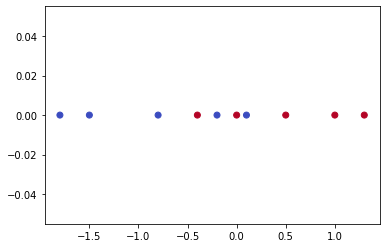

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([-1.8,-1.5,-0.8,-0.4,-0.2, 0.0, 0.1, 0.5, 1.0, 1.3])
y = np.array([ 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0,  1.0, 1.0, 1.0])
yh = np.array([ -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0])

plt.scatter(x,np.zeros(10), c=y,cmap=plt.cm.coolwarm)

In [2]:
from sklearn.linear_model import LogisticRegression

# treinando o modelo
logr1 = LogisticRegression(solver='lbfgs')
logr1.fit(x.reshape(-1, 1), y)

# pegando as probabilidades de saída
y_hat = logr1.predict_proba(x.reshape(-1, 1))[:, 1].ravel()
print('y1    = {}'.format(np.round(y , 3)))
print('y_hat = {}'.format(np.round(y_hat, 3)))

# classificando para calcular a perda 0-1
y_clas = y_hat.copy()
y_clas[y_clas>=0.5] = 1
y_clas[y_clas<0.5] = 0

# calculando a saída hinge, entre -1 e 1
y_hat_hi = (y_hat-0.5)*2
print('y_hat_hi= {}'.format(np.round(y_hat_hi, 3)))

# perda quadrática
loss_qu = np.power(y-y_hat,2)
# perda de entropia cruzada
loss_ec = -(y*np.log(y_hat+.00001) + (1-y)*np.log(1-y_hat +.00001))
# perda zero-um
loss_01 = (y!=y_clas)*1

# perda hinge
hi_mult = 1-(yh*y_hat_hi)
loss_hi = [max(0,mi) for mi in hi_mult]
print('1-y*y_hat= {}'.format(np.round(hi_mult, 3)))


y1    = [0. 0. 0. 1. 0. 1. 0. 1. 1. 1.]
y_hat = [0.133 0.178 0.325 0.433 0.49  0.547 0.576 0.682 0.792 0.843]
y_hat_hi= [-0.735 -0.645 -0.349 -0.134 -0.02   0.095  0.151  0.365  0.585  0.687]
1-y*y_hat= [0.265 0.355 0.651 1.134 0.98  0.905 1.151 0.635 0.415 0.313]


In [3]:
print("Perdas calculadas por instância:")
print(np.round(loss_qu,3))
print(np.round(loss_ec,3))
print(np.round(loss_01,3))
print(np.round(loss_hi,3))
print()

print("Perda quadrática = %.4f" % (np.mean(loss_qu)))
print("Entropia cruzada = %.4f" % (np.mean(loss_ec)))
print("Perda 0-1        = %.4f" % (np.mean(loss_01)))
print("Perda hinge/svm  = %.4f" % (np.mean(loss_hi)))

Perdas calculadas por instância:
[0.018 0.032 0.106 0.321 0.24  0.205 0.331 0.101 0.043 0.025]
[0.142 0.195 0.394 0.837 0.674 0.603 0.857 0.382 0.233 0.17 ]
[0 0 0 1 0 0 1 0 0 0]
[0.265 0.355 0.651 1.134 0.98  0.905 1.151 0.635 0.415 0.313]

Perda quadrática = 0.1421
Entropia cruzada = 0.4487
Perda 0-1        = 0.2000
Perda hinge/svm  = 0.6805


---

### Exercício 2)

Considere as funções de custo vistas em aula e estudadas no exercício anterior: Perda Quadrática (MSE), Erro Absoluto (MAE), Perda 0-1, Perda Hinge/SVM, Entropia Cruzada. Como escolher uma função para realizar o treinamento de uma rede neural?

(a) Na dúvida escolher sempre a entropia cruzada, pois é a mais popular e considerada um padrão na literatura da área de redes neurais<br>
(b) Desde que a função permita medir o erro do modelo atual, permite por consequência também medir o custo de escolher os parâmetros atuais, então qualquer função pode ser utilizada sem restrições<br>
<font color='red'>(c) Considerar o problema em questão: classificação binária, multiclasse, regressão, etc e entender a magnitude dos valores das funções com base no problema e sua capacidade de guiar o modelo no processo de convergência<br></font>
(d) Em geral, a entropia cruzada deve ser utilizada para problemas de classificação, e a perda quadrática para problemas de regressão, não sendo necessário investigar outras funções de custo pois são mais relevantes outros parâmetros como a taxa de aprendizado e o tamanho do batch<br>

**Justificativa:** Apesar de mais popular, a entropia cruzada pode não funcionar bem em todos os cenários. Por outro lado, fazer uma busca exaustiva é impraticável. Assim, é preciso tomar uma decisão "educada" com base no problema em questão, os valores de saída, e selecionar um subconjunto de funções candidatas a serem investigadas para resolver o problema.

---
### Exercício 3)

Considerando as funções de perda: entropia cruzada categórica e perda quadrática, qual é o valor das perdas para um exemplo arbitrário no momento da inicialização aleatória de um modelo numa tarefa de classificação de 5 classes?

 (a) <font color='red'>Entropia Cruzada = 1.6; Quadrática = 0.8</font><br>
 (b) Entropia Cruzada = 2.3; Quadrática = 0.8<br>
 (c) Entropia Cruzada = 1.6; Quadrática = 0.16<br>
 (d) Entropia Cruzada = 0.32; Quadrática = 0.8<br>
 
 **Justificativa**: veja código abaixo. Na inicialização aleatória, teríamos um classificador gerando um vetor de probabilidade com a distribuição aproximadamente uniforme, ou seja, todos os valores 0.2=1/5. Computando a entropia cruzada categórica, temos apenas o -log do valor predito para a classe verdadeira, enquanto que na quadrática, a soma dos erros cometidos ao longo do vetor.

In [4]:
y = np.array([.0, .0, .0, .0, 1.0])
yh = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

loss_ec = -np.sum((y*np.log(yh+.00001)))

loss_qu = np.sum(np.power(y-yh,2))
print(loss_ec)
print(loss_qu)


1.6093879136840585
0.8000000000000002


---
### Exercício 4)

Sobre os métodos de otimização, o que podemos dizer quando comparamos SGD e Adam?

 <font color='red'>(a) Ambos realizam atualização iterativa dos parâmetros usando o gradiente, mas o Adam incorpora mecanismos baseados em gradientes anteriores, e o segundo momento do gradiente como ponderação da taxa de aprendizado</font><br>
 (a) O SGD é equivalente ao Adam quando aplicado Momentum no algoritmo SGD base<br>
 (c) Ambos realizam atualização iterativa dos parâmetros usando o gradiente, mas apenas SGD permite decaimento da taxa de aprendizado <br>
 (d) O Adam é um algoritmo de otimização que obtém sempre melhores resultados do que o SGD e suas variações<br>
 
  
 **Justificativa**: o SGD utiliza apenas o gradiente, enquanto o Adam computa primeiro momento do gradiente corrigida, e o segundo momento como forma de ponderar a magnitude do passo. As outras alternativas são inválidas porque: Adam utiliza uma estratégia similar, mas não igual ao momentum, e também possui um tipo de taxa de aprendizado adaptativa; Adam também permite decaimento da taxa de aprendizado; finalmente, não é possível dizer que um algoritmo de otimização é melhor sempre. Ainda que tenha mecanismos mais sofisticados, notar por exemplo que muitos modelos do estado da arte são treinados com SGD + Momentum.

---

### Exercício 5)

Dentre as alternativas, escolha a prática válida mais relevante ao projetar o treinamento de redes profundas

(a) Inicializar todos os pesos com valores aleatórios e utilizar o maior número de instâncias possíveis no treinamento, garantindo que os hiperparâmetros com valor padrão obterão bons resultados<br>
(b) Utilizar sempre a função de custo entropia cruzada, para a qual é recomendado o uso do otimizador Adam e taxa de aprendizado com decaimento. Definir a melhor taxa de decaimento de forma a minimizar a diferença entre o custo de treinamento e validação<br>
<font color='red'>(c) Utilizar conjunto pequeno de instâncias para busca grosseira de hiperparâmetros como: otimizador, taxa de aprendizado, momentum e tamanho de batch, e depois refinar a busca num conjunto maior com base em métricas obtidas nos conjuntos de validação e treinamento<br></font>
(d) Rezar para Yan LeCun, Yoshua Bengio, Geoffrey Hinton e Kunihiko Fukushima.


 **Justificativa**: nem sempre os valores padrão serão bons hiperparâmetros. Ainda que algumas escolhas sejam populares (como uso de Adam e Entropia Cruzada), o melhor é sempre realizar uma busca, ainda que grosseira com poucos dados, por parâmetros que se ajustem à arquitetura projetada. Se você acredita, rezar pode até te acalmar, mas não vai ajudar no treinamento da rede. Felizmente os 4 estão vivos, então tentar contatá-los no Twitter pode ser uma opção ;)
 

---

### Exercício 6)

Qual a principal diferença das arquiteturas VGGNet, Inception e Residual Network com relação à suas camadas convolucionais?

(a) A VGGNet possui camadas convolucionais com filtros de mesmo tamanho $3\times3$, enquanto as outras arquiteturas, Inception e ResNet aplicam filtros $5\times5$ ou com concatenação de mapas de ativação ao longo da rede<br>
(b) A rede Inception permite treinamento com maior número de camadas quanto comparada à VGGNet, que por sua vez permite treinamento com maior número de camadas quanto comparada à ResNet <br>
(c) A VGGNet possui camadas convolucionais sequenciais, eventualmente seguidas de MaxPooling, enquanto a ResNet computa mapas de ativação de com diferentes filtros, concatenando-os, e a Inception possui um módulo do tipo banco de filtros, que permite saltar para camadas futuras, facilitando o treinamento com mais camadas<br>
<font color='red'>(d) A VGGNet possui camadas convolucionais sequenciais, enquanto Inception possui camadas convolucionais paralelas, e ResNet tem mapas de ativação que desviam da lógica sequencial e pulam camadas<br></font>

 **Justificativa**: Sua principal diferença é o fluxo durante a rede, sendo a VGG sequencial e as outras duas cujas ativações dão saltos (ResNet) ou possuem paralelismo (Inception). Alternativa (a) está errada pois ResNet não aplica filtros de tamanho maior do que 5x5, nem realiza concatenação de mapas de ativação (mas sim a soma); (b) é inválida pois a ResNet permite treinar com mais camadas do que a VGG; (c) está errada pois Inception não possui saltos nas camadas, nem ResNet possui concatenação de mapas. 1

---

### Exercício 7)

Utilizando a biblioteca Keras, investige o impacto do uso de parâmetros padrão de learning rate na base de dados Boston Housing, com relação ao uso de decaimento de learning rate, a partir de um valor estabelecido.

Carregue a base de dados e normalize os atributos com z-score. Crie uma rede com camadas densas: 16, 8 e 1 (de saída), todas com ativação `relu`.

Treine por 50 épocas 2 redes neurais com a função de custo `mse`, medindo também a `mae`

A. Com otimizador Adam e todos os outros parâmetros no valor padrão
B. Com otimizador Adam, iniciando com learning rate 0.02 e decaimento exponencial de 0.05 a partir da época 10

Antes de projetar, compilar e treinar cada rede, defina as sementes do numpy para 1 e do tensorflow para 2.

Use os dados de teste como "validação" durante o treinamento.

Considerando os valores de erro (MSE e MAE) na última época de ambos A e B, e considerando ainda generalização como a divergência entre os erros de treinamento e validação, podemos dizer que:

(a) B obteve menores valores de erro (MSE e MAE) do que A, mas em termos de generalização (entre treinamento e validação) ambos tiveram comportamento similar, com pequena vantagem para B<br>
<font color='red'>(b) B obteve menores valores de erro (MSE e MAE) do que A, porém A obteve melhor generalização dos erros (entre treinamento e validação).<br></font>
(c) B obteve valores de MSE significativamente menores do que A, mas A generalizou melhor com relação ao MAE, indicando que A pdoeria ser treinado por mais épocas.<br>
(d) B obteve MSE de validação próximo a 7, A obteve 21 na mesma métrica, indicando que A não convergiu e apenas B generalizou<br>

**Justificativa**: Notar no código abaixo que A obteve no treinamento mse: 21 e mae: 3, e na validacao mse: 28 e mae: 4; enquanto isso B obteve no treinamento mse: 7, mae: 2, e na validacao mse: 23, mae:3, assim B foi melhor em geral, mas em termos de generalização A apresentou valores mais próximos quando comparamos treinamento e validação.



In [32]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import boston_housing
from numpy.random import seed
from tensorflow.random import set_seed

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std

x_test -= mean
x_test /= std

In [33]:
seed(1)
set_seed(2)

model1 = keras.Sequential()
model1.add(keras.layers.Dense(16, activation="relu", input_shape=(x_train.shape[1],)))
model1.add(keras.layers.Dense(8, activation="relu"))
model1.add(keras.layers.Dense(1, activation="relu"))
model1.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 16)                224       
_________________________________________________________________
dense_42 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 9         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [34]:
epochs=50

In [35]:
model1.compile(optimizer="adam",
               loss='mse', metrics=['mae'])

history = model1.fit(x_train, y_train, epochs=epochs,
                     validation_data=(x_test,y_test), verbose=1)

Epoch 1/50
13/13 [==============================] - 0s 5ms/step - loss: 585.1754 - mae: 22.3727 - val_loss: 613.9129 - val_mae: 23.0327
Epoch 2/50
13/13 [==============================] - 0s 1ms/step - loss: 583.2806 - mae: 22.3219 - val_loss: 611.5378 - val_mae: 22.9651
Epoch 3/50
13/13 [==============================] - 0s 1ms/step - loss: 580.0660 - mae: 22.2220 - val_loss: 607.6867 - val_mae: 22.8512
Epoch 4/50
13/13 [==============================] - 0s 2ms/step - loss: 575.4921 - mae: 22.0783 - val_loss: 602.3406 - val_mae: 22.6769
Epoch 5/50
13/13 [==============================] - 0s 2ms/step - loss: 569.1945 - mae: 21.8791 - val_loss: 595.4497 - val_mae: 22.4521
Epoch 6/50
13/13 [==============================] - 0s 2ms/step - loss: 560.9045 - mae: 21.6187 - val_loss: 586.7144 - val_mae: 22.2004
Epoch 7/50
13/13 [==============================] - 0s 2ms/step - loss: 550.8667 - mae: 21.3266 - val_loss: 576.0062 - val_mae: 21.8998
Epoch 8/50
13/13 [==============================

In [36]:
seed(1)
set_seed(2)

model2 = keras.Sequential()
model2.add(keras.layers.Dense(16, activation="relu", input_shape=(x_train.shape[1],)))
model2.add(keras.layers.Dense(8, activation="relu"))
model2.add(keras.layers.Dense(1, activation="relu"))
model2.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 16)                224       
_________________________________________________________________
dense_45 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 9         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [37]:
def scheduler(epoch, lr):
    print("Taxa atual = %.5f" % (lr))
    if epoch < 10:
        return lr
    else:
        return np.round(lr * tf.math.exp(-0.05),4)

callbacklr = keras.callbacks.LearningRateScheduler(scheduler)

model2.compile(optimizer=keras.optimizers.Adam(0.02),
              loss='mse', metrics=['mae'])

history = model2.fit(x_train, y_train, epochs=epochs,
                     callbacks=[callbacklr],  validation_data=(x_test,y_test),
                    verbose=1)

Taxa atual = 0.02000
Epoch 1/50
13/13 [==============================] - 0s 5ms/step - loss: 546.3033 - mae: 21.0637 - val_loss: 502.7121 - val_mae: 19.6967
Taxa atual = 0.02000
Epoch 2/50
13/13 [==============================] - 0s 1ms/step - loss: 364.7381 - mae: 16.3605 - val_loss: 209.1097 - val_mae: 12.1302
Taxa atual = 0.02000
Epoch 3/50
13/13 [==============================] - 0s 1ms/step - loss: 88.3731 - mae: 7.2638 - val_loss: 78.3675 - val_mae: 6.6225
Taxa atual = 0.02000
Epoch 4/50
13/13 [==============================] - 0s 1ms/step - loss: 41.4213 - mae: 4.5843 - val_loss: 40.2851 - val_mae: 5.1418
Taxa atual = 0.02000
Epoch 5/50
13/13 [==============================] - 0s 1ms/step - loss: 28.1764 - mae: 4.0251 - val_loss: 28.4457 - val_mae: 4.1727
Taxa atual = 0.02000
Epoch 6/50
13/13 [==============================] - 0s 2ms/step - loss: 21.8347 - mae: 3.3420 - val_loss: 24.9516 - val_mae: 3.9363
Taxa atual = 0.02000
Epoch 7/50
13/13 [==============================] - 0

---

### Exercício 8)


Utilizando ainda a biblioteca Keras, investige o impacto do uso de parâmetros padrão de batchsize na base de dados Boston Housing, agora utilizando a mesma arquitetura da atividade anterior, com otimizador Adam, iniciando com learning rate 0.02 e decaimento exponencial de 0.1 a partir da época 6.

Investige valores de batch = 2, 4, 8, 16, 32, 64, 128 e 256 executando por um número de épocas proporcional ao tamanho do batch atual, calculado por:
$epocas = \lfloor \log_2(512 \cdot batchsize) \rfloor$, valor deve ser convertido para inteiro. Esse número de épocas proporcional permite equilibrar um pouco a relação entre velocidade e quantidade de vezes que os parâmetros são adaptados.

Antes de projetar, compilar e treinar cada rede, defina as sementes do numpy para 1 e do tensorflow para 2.

Não passe dados de validação durante o treinamento. Após o treinamento, avalie MSE nos dados de teste e imprima para comparar os valores para diferentes batchsizes.

Quais foram os dois piores e os dois melhores valores de tamanho de batch em termos do MSE de teste?

<font color='red'>(a) Piores: 128 e 256; Melhores: 4 e 16<br></font>
(b) Piores: 16 e 64; Melhores: 32 e 128<br>
(c) Piores: 2 e 4; Melhores: 32 e 64<br>
(d) Piores: 4 e 256; Melhores: 2 e 128<br>

**Justificativa**: Notar no código abaixo a comparação.

In [41]:
def my_dnn():
    model2 = keras.Sequential()
    model2 = keras.Sequential()
    model2.add(keras.layers.Dense(16, activation="relu", input_shape=(x_train.shape[1],)))
    model2.add(keras.layers.Dense(8, activation="relu"))
    model2.add(keras.layers.Dense(1, activation="relu"))
    return model2

In [81]:
def scheduler(epoch, lr):
    if epoch < 6:
        return lr
    else:
        return np.round(lr * tf.math.exp(-0.1),4)

callbacklr = keras.callbacks.LearningRateScheduler(scheduler)

In [87]:
batches = [2, 4, 8, 16, 32, 64, 128, 256]

for batch_size in batches:
    seed(1)
    set_seed(2)
    model = my_dnn()
    model.compile(optimizer=keras.optimizers.Adam(0.02),
                  loss='mse', metrics=['mae'])
    
    epochs = int(np.log2((batch_size*512)))
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                         callbacks=[callbacklr], verbose=0)
    
    score = model.evaluate(x_test, y_test, verbose = 0)
    print("Batch size = %d, Erro de Validação MSE = %.4f (Epocas=%d)" % (batch_size, score[0], epochs))

Batch size = 2, Erro de Validação MSE = 22.4658 (Epocas=10)
Batch size = 4, Erro de Validação MSE = 19.1443 (Epocas=11)
Batch size = 8, Erro de Validação MSE = 23.9285 (Epocas=12)
Batch size = 16, Erro de Validação MSE = 21.6256 (Epocas=13)
Batch size = 32, Erro de Validação MSE = 25.3148 (Epocas=14)
Batch size = 64, Erro de Validação MSE = 23.7474 (Epocas=15)
Batch size = 128, Erro de Validação MSE = 30.6913 (Epocas=16)
Batch size = 256, Erro de Validação MSE = 129.7601 (Epocas=17)


---

### Exercício 9)

O que podemos concluir dos dois exercícios anteriores (7 e 8)?

(a) Os valores padrão para os hiperparâmetros geram bons resultados. A busca por outros parâmetros pode não valer a pena pois a diferença alcançada observada é pequena.<br>
(b) Devemos sempre utilizar Adam com decaimento de taxa de aprendizado e batch size de tamanho entre 8 e 64, sendo que o uso do padrão (32) é normalmente suficiente.<br>
(c) Batchs de tamanho muito grande são prejudiciais ao treinamento, e o otimizador Adam é sempre melhor com decaimento de taxa de aprendizado.<br>
<font color='red'>(d) O uso de hiperparâmetros com valores padrão pode gerar resultados subótimos, sendo importante uma busca de parâmetros para melhor otimizar modelos<br></font>

---

### Exercício 10)

Carregue a base de dados Fashion MNIST

Crie duas redes neurais utilizando os blocos Residuais e módulos Inception conforme visto em aula.

* InceptionNet
    * Módulo Inception V1 com número de filtros: 32, 32, 32, 32, 32, 16
    * Maxpooling com pool=2, stride=2
    * Módulo Inception V1 com número de filtros: 32, 64, 64, 64, 64, 16
    * Maxpooling com pool=2, stride=2
* ResNet
    * 3 blocos residuais com 64 filtros, cada um seguido por camada Maxpooling com pool=2, stride=2

Ambos devem possuir uma camada `GlobalAveragePooling2D` antes da camada de predição.

Treine ambas com SGD, learning rate 0.05 e momentum 0.8, utilizando batchsize 64, e apenas as 800 primeiras imagens do dataset de treinamento (use :800), por 100 épocas.

Ao final compute a perda e a acurácia no treinamento (800 imagens) e teste (todas as imagens do teste), e exiba o gráfico da perda ao longo das épocas para as duas arquiteturas.

Marque a alternativa que melhor se encaixa no resultado observado e sua conclusão.

<font color='red'>(a) A ResNet conseguiu ajustar perfeitamente aos dados de treinamento, mas com perda mais alta calculada no teste, indicando overfitting, enquanto a Inception tem espaço para melhorias<br></font>
(b) As duas arquiteturas obtiveram boa generalização, mas a Inception possui claras vantagens frente à ResNet, com maior acurácia no teste<br>
(c) A Inception teve melhor generalização mas não convergiu para perda próxima a zero com 100 épocas, portanto a taxa de aprendizado escolhida poderia ser reduzida para obter resultados melhores, enquanto a ResNet poderia ser treinada por mais épocas para melhorar a acurácia no teste.<br>
(d) Os resultados de acurácia e perda no teste da ResNet são muito diferentes daqueles obtidos no treinamento, indicando underfitting, ou seja, uma incapacidade do modelo de se ajustar aos dados utilizados no processo de aprendizado<br>

**Justificativa**: Nenhuma arquitetura apresenta boa generalização, visto que tanto a perda quanto a acurácia diferem quando computadas no treinamento e no teste. O caso dessa diferença é um sinal de overfitting, e não de underfitting, já que o modelo foi capaz de se ajustar perfeitamente (com perda 0) para o treinamento. Além disso, reduzir a taxa de aprendizado torna a convergência mais lenta, e não mais rápida. Finalmente, quando um modelo alcança custo zero no treinamento, o gradiente também vai para zero e não há mais benefícios em treinar por mais épocas.

In [14]:
# carregando datasets do keras
#from tensorflow.keras.datasets import mnist

from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# obtendo informações das imagens (resolucao) e dos rótulos (número de classes)
img_lin, img_col = x_train.shape[1], x_train.shape[2]
num_classes = len(np.unique(y_train))

print(x_train.shape)

# dividir por 255 para obter normalizacao
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# transformar categorias em one-hot-encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# verifica imagens da base de dados tem 3 canais (RGB) ou apenas 1 (escala de cinza)
if (len(x_train.shape) == 3):
      n_channels = 1
else:
      n_channels = x_train.shape[3]

# re-formata o array de forma a encontrar o formato da entrada (input_shape)
# se a dimensão dos canais vem primeiro ou após a imagem
if keras.backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], n_channels, img_lin, img_col)
    x_test = x_test.reshape(x_test.shape[0], n_channels, img_lin, img_col)
    input_shape = (n_channels, img_lin, img_col)
else:
    x_train = x_train.reshape(x_train.shape[0], img_lin, img_col, n_channels)
    x_test = x_test.reshape(x_test.shape[0], img_lin, img_col, n_channels)
    input_shape = (img_lin, img_col, n_channels)

print("Shape: ", input_shape)

(60000, 28, 28)
Shape:  (28, 28, 1)


In [15]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import add

def inception_module(layer_in, f1_out, f2_in, f2_out, f3_in, f3_out, f4_out):
    # 1x1 conv
    conv1 = Conv2D(f1_out, (1,1), padding='same', activation='relu')(layer_in)
    # 3x3 conv
    conv3 = Conv2D(f2_in, (1,1), padding='same', activation='relu')(layer_in)
    conv3 = Conv2D(f2_out, (3,3), padding='same', activation='relu')(conv3)
    # 5x5 conv
    conv5 = Conv2D(f3_in, (1,1), padding='same', activation='relu')(layer_in)
    conv5 = Conv2D(f3_out, (5,5), padding='same', activation='relu')(conv5)
    # 3x3 max pooling
    pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
    pool = Conv2D(f4_out, (1,1), padding='same', activation='relu')(pool)
    layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)
    return layer_out
 
# define model input
input_layer = Input(shape=input_shape)
# add inception blocks
layer1 = inception_module(input_layer, 32, 32, 32, 32, 32, 16)
pool1 = MaxPooling2D((2,2), strides=(2,2), padding='same')(layer1) #
layer2 = inception_module(pool1, 32, 64, 64, 64, 64, 16) # rem?
pool2 = MaxPooling2D((2,2), strides=(2,2), padding='same')(layer2)
flatt = keras.layers.GlobalAveragePooling2D()(pool2)

softmax = keras.layers.Dense(num_classes, activation='softmax')(flatt)

# create model
Inception = keras.models.Model(inputs=input_layer, outputs=softmax)
# summarize model
Inception.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 32)   64          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 28, 28, 32)   64          input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 28, 28, 1)    0           input_1[0][0]                    
_______________________________________________________________________________________

In [16]:
def residual_block(layer_in, n_filters):
    merge_input = layer_in
    #verifica se é necessária uma primeira camada para deixar o número de filtros iguais para adição
    if layer_in.shape[-1] != n_filters:
        merge_input = Conv2D(n_filters, (1,1), padding='same', activation='relu', kernel_initializer='he_normal')(layer_in)
    # conv1
    conv1 = Conv2D(n_filters, (3,3), padding='same', activation='relu', kernel_initializer='he_normal')(layer_in)
    # conv2
    conv2 = Conv2D(n_filters, (3,3), padding='same', activation='linear', kernel_initializer='he_normal')(conv1)
    # soma entrada com saída (pulou 2 camadas)
    layer_out = add([conv2, merge_input])
    # função de ativação da saída do bloco
    layer_out = keras.layers.Activation('relu')(layer_out)
    return layer_out
 
# define model input
visible = Input(shape=input_shape)

layer1 = residual_block(visible, 64)
pool1 = MaxPooling2D((2,2), strides=(2,2), padding='same')(layer1)
layer2 = residual_block(pool1, 64)
pool2 = MaxPooling2D((2,2), strides=(2,2), padding='same')(layer2)
layer3 = residual_block(pool2, 64)
pool3 = MaxPooling2D((2,2), strides=(2,2), padding='same')(layer3)
flatt = keras.layers.GlobalAveragePooling2D()(pool3)
softmax = keras.layers.Dense(num_classes, activation='softmax')(flatt)

# create model
ResNet = keras.models.Model(inputs=visible, outputs=softmax)
# summarize model
ResNet.summary()


Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 28, 28, 64)   640         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 28, 28, 64)   36928       conv2d_13[0][0]                  
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 28, 28, 64)   128         input_2[0][0]                    
_______________________________________________________________________________________

In [17]:
x_sub = x_train[:800]
y_sub = y_train[:800]
batch_size = 64
epochs = 100

In [18]:
# as sementes ajudam a ter resultados reproduzíveis
#tf.keras.backend.clear_session()
seed(1)
set_seed(2)

Inception.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.05, momentum=0.8),
              metrics=['accuracy'])

histInc = Inception.fit(x_sub, y_sub,
                    batch_size=batch_size,
                    epochs=epochs, verbose=0)

In [19]:
# as sementes ajudam a ter resultados reproduzíveis
#tf.keras.backend.clear_session()
seed(1)
set_seed(2)

ResNet.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.05, momentum=0.8),
              metrics=['accuracy'])

histResNet = ResNet.fit(x_sub, y_sub,
                    batch_size=batch_size,
                    epochs=epochs, verbose=0)

In [20]:
score1T = Inception.evaluate(x_sub, y_sub, verbose = 0)
score2T = ResNet.evaluate(x_sub, y_sub, verbose = 0)

score1 = Inception.evaluate(x_test, y_test, verbose = 0)
score2 = ResNet.evaluate(x_test, y_test, verbose = 0)

In [21]:
print("Inception Treinamento = Loss %.3f, Accuracy %.3f" % (score1T[0], score1T[1]))
print("Inception Teste       = Loss %.3f, Accuracy %.3f" % (score1[0], score1[1]))

print("ResNet Treinamento    = Loss %.3f, Accuracy %.3f" % (score2T[0], score2T[1]))
print("ResNet Teste          = Loss %.3f, Accuracy %.3f" % (score2[0], score2[1]))

Inception Treinamento = Loss 0.345, Accuracy 0.858
Inception Teste       = Loss 0.715, Accuracy 0.758
ResNet Treinamento    = Loss 0.000, Accuracy 1.000
ResNet Teste          = Loss 1.515, Accuracy 0.800


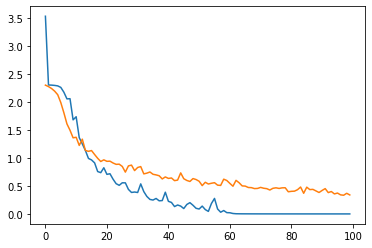

In [22]:
plt.plot(histResNet.history['loss'])
plt.plot(histInc.history['loss'])